In [1]:
# Frequent Category Imputation
import pandas as pd

In [90]:
df = pd.read_csv('ahp_train.csv',usecols = ['BsmtQual','GarageType','FireplaceQu','SalePrice'])

In [91]:
df.FireplaceQu.mode()

0    Gd
Name: FireplaceQu, dtype: object

In [3]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [36]:
#checking the null values -------- in ascending order
df.isnull().sum().sort_values(ascending = True)

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [8]:
df.groupby('BsmtQual')['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<Axes: xlabel='BsmtQual'>

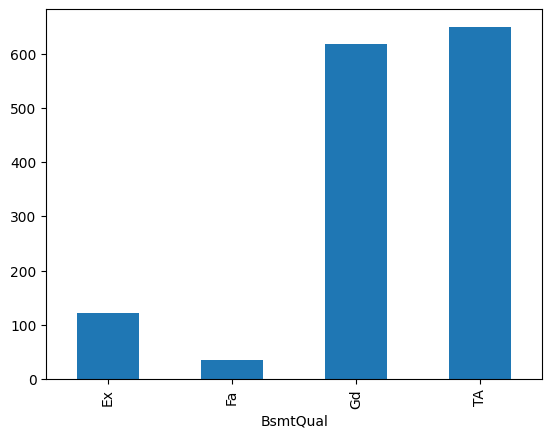

In [6]:
df.groupby('BsmtQual')['BsmtQual'].count().plot.bar()

In [10]:
df.groupby('BsmtQual')['GarageType'].count()

BsmtQual
Ex    121
Fa     32
Gd    601
TA    595
Name: GarageType, dtype: int64

In [9]:
df.groupby('BsmtQual')['GarageType'].value_counts()

BsmtQual  GarageType
Ex        Attchd         99
          BuiltIn        20
          Detchd          2
Fa        Detchd         24
          Attchd          6
          Basment         1
          CarPort         1
Gd        Attchd        462
          Detchd         71
          BuiltIn        57
          Basment         8
          CarPort         3
TA        Attchd        294
          Detchd        272
          Basment        10
          BuiltIn        10
          2Types          6
          CarPort         3
Name: count, dtype: int64

<Axes: xlabel='BsmtQual,GarageType'>

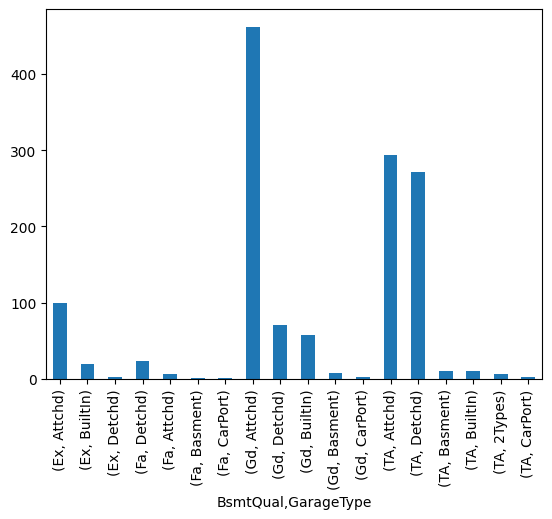

In [11]:
df.groupby('BsmtQual')['GarageType'].value_counts().plot.bar()

In [12]:
df.groupby('BsmtQual')['FireplaceQu'].value_counts()

BsmtQual  FireplaceQu
Ex        Gd              81
          Ex              16
          TA               8
Fa        Gd               4
          TA               4
Gd        TA             207
          Gd             153
          Fa              11
          Po               5
          Ex               4
TA        Gd             138
          TA              91
          Fa              22
          Po              14
          Ex               3
Name: count, dtype: int64

In [13]:
df.groupby('BsmtQual')['FireplaceQu'].count()

BsmtQual
Ex    105
Fa      8
Gd    380
TA    268
Name: FireplaceQu, dtype: int64

In [16]:
df.groupby('BsmtQual')['SalePrice'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: SalePrice, dtype: int64

In [17]:
df.GarageType.value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [19]:
df.GarageType.value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object', name='GarageType')

In [31]:
df.GarageType.mode()

0    Attchd
Name: GarageType, dtype: object

In [32]:
df.GarageType.mode().index[0]

0

In [95]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [93]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [37]:
dafa = pd.read_csv('ahp_train.csv',usecols = ['BsmtQual','GarageType','FireplaceQu','SalePrice'])

In [43]:
dafa.BsmtQual.mode()

0    TA
Name: BsmtQual, dtype: object

In [44]:
dafa.GarageType.mode()

0    Attchd
Name: GarageType, dtype: object

In [42]:
dafa.FireplaceQu.mode()

0    Gd
Name: FireplaceQu, dtype: object

In [45]:
dafa.SalePrice.mode()

0    140000
Name: SalePrice, dtype: int64

In [46]:
dafa.SalePrice.mean()

180921.19589041095

In [51]:
dafa.SalePrice.median()

163000.0

In [52]:
dafa.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [55]:
dafa.isnull().sum()

BsmtQual         37
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_var      0
dtype: int64

In [53]:
import numpy as np

In [54]:
dafa['BsmtQual_var'] = np.where (df.BsmtQual.isnull(),1,0)
dafa.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [57]:
## Suppose if you have more frequent categories 
# We just replace NaN with a new category

In [58]:
def impute_naan(df,variable):
    df[variable + "_newVar"] = np.where(df[variable].isnull(),'Missing',df[variable])

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_naan(dafa,feature)

In [59]:
dafa

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,BsmtQual_newVar,FireplaceQu_newVar,GarageType_newVar
0,Gd,NaN,Attchd,208500,0,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,0,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,0,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,0,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,0,Gd,TA,Attchd
...,...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,Gd,TA,Attchd
1456,Gd,TA,Attchd,210000,0,Gd,TA,Attchd
1457,TA,Gd,Attchd,266500,0,TA,Gd,Attchd
1458,TA,NaN,Attchd,142125,0,TA,Missing,Attchd


In [61]:
dafa = dafa.drop(['BsmtQual','FireplaceQu','GarageType'],axis = 1)

In [62]:
dafa

,SalePrice,BsmtQual_var,BsmtQual_newVar,FireplaceQu_newVar,GarageType_newVar
0,208500,0,Gd,Missing,Attchd
1,181500,0,Gd,TA,Attchd
2,223500,0,Gd,TA,Attchd
3,140000,0,TA,Gd,Detchd
4,250000,0,Gd,TA,Attchd
...,...,...,...,...,...
1455,175000,0,Gd,TA,Attchd
1456,210000,0,Gd,TA,Attchd
1457,266500,0,TA,Gd,Attchd
1458,142125,0,TA,Missing,Attchd


In [64]:
dafa.drop('BsmtQual_var',axis = 1)

,SalePrice,BsmtQual_newVar,FireplaceQu_newVar,GarageType_newVar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


In [68]:
## One Hot Encoding
dataset = pd.read_csv('titanic.csv',usecols = ['Sex'])

In [69]:
dataset.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [71]:
pd.get_dummies(dataset,drop_first = True)

,Sex_male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [73]:
dataset = pd.read_csv('titanic.csv',usecols = ['Embarked'])

In [74]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [79]:
dataset.dropna(inplace = True)

In [86]:
dataset = pd.get_dummies(dataset,drop_first = True).head()

In [88]:
dataset.Embarked_S.unique()

array([ True, False])

In [89]:
dataset

,Embarked_Q,Embarked_S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [97]:
df1 = pd.read_csv('mercedes_train.csv')

In [98]:
df1

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df1.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [101]:
df1=pd.read_csv("mercedes_train.csv",usecols=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'])

In [102]:
df1

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [103]:
df1.isnull().sum()

X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [106]:
df1.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [108]:
for i in df1.columns:
    print(df1[i].value_counts())

X0
z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: count, dtype: int64
X1
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: count, dtype: int64
X2
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
a

In [111]:
len(df1.X0.value_counts().unique())

37

In [134]:
for i in df1.columns:
    print(i+" : "+str(len(df1[i].unique())))

X0 : 47
X1 : 27
X2 : 44
X3 : 7
X4 : 4
X5 : 29
X6 : 12


In [135]:
for i in df1.columns:
    print(i+" : "+str(len(df1[i].value_counts())))

X0 : 47
X1 : 27
X2 : 44
X3 : 7
X4 : 4
X5 : 29
X6 : 12


In [128]:
for i in df1.columns:
    print(len(df1[i].unique()))

47
27
44
7
4
29
12


In [141]:
df1.X1.value_counts().sort_values(ascending = False).head(10)

X1
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: count, dtype: int64

In [139]:
lst_10 = df1.X1.value_counts().sort_values(ascending = False).head(10).index

In [140]:
lst_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object', name='X1')

In [156]:
llst_10 = list(lst_10)

In [157]:
llst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [158]:
import numpy as np

In [159]:
for categories in llst_10:
    df1[categories] = np.where(df1['X1'] == categories,1,0)

In [160]:
df1[llst_10]

,aa,s,b,l,v,r,i,a,c,o
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0


In [161]:
llst_10.append('X1')

In [162]:
 llst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o', 'X1']

In [163]:
df1[llst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,0


In [164]:
df1.X1.unique()

array([0])

In [168]:
dff = pd.read_csv('mercedes_train.csv',usecols =['X0','X1','X2','X3','X4','X5','X6'])

In [173]:
dff.X0.unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [189]:
dff.X0.unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [174]:
len(dff.X0.unique())

47

In [177]:
len(dff.X0.value_counts())

47

In [178]:
dff.X0.value_counts()

X0
z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: count, dtype: int64

In [191]:
len(dff.X0.value_counts().unique())

37

In [192]:
dff

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [193]:
df1

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,0,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,0,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,0,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,0,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,0,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,0,as,c,d,aa,d,0,0,0,0,0,0,0,0,0,0
4205,j,0,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,0
4206,ak,0,r,a,d,aa,g,0,0,0,0,0,0,0,0,0,0
4207,al,0,e,f,d,aa,l,0,0,0,0,0,0,0,0,0,0


In [194]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Gd,Attchd,142125


In [195]:
dataset

,Embarked_Q,Embarked_S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [196]:
dafa

,SalePrice,BsmtQual_var,BsmtQual_newVar,FireplaceQu_newVar,GarageType_newVar
0,208500,0,Gd,Missing,Attchd
1,181500,0,Gd,TA,Attchd
2,223500,0,Gd,TA,Attchd
3,140000,0,TA,Gd,Detchd
4,250000,0,Gd,TA,Attchd
...,...,...,...,...,...
1455,175000,0,Gd,TA,Attchd
1456,210000,0,Gd,TA,Attchd
1457,266500,0,TA,Gd,Attchd
1458,142125,0,TA,Missing,Attchd


In [198]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [199]:
dafa.columns

Index(['SalePrice', 'BsmtQual_var', 'BsmtQual_newVar', 'FireplaceQu_newVar',
       'GarageType_newVar'],
      dtype='object')

In [200]:
dff.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')